
## Multiple linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data["MEDV"]=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Train-test split

In [9]:
x=data.drop(["MEDV"],axis=1)
y=data['MEDV']

In [10]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
col=['CRIM',"ZN",'INDUS',"CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
x[col]=sc.fit_transform(x[col])

In [11]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Create cost and gradient function

In [12]:
def CostFunction(x,y,w,b):
    cost=np.sum((((x.dot(w)+b)-y)**2)/(2*len(y)))
    return cost

def GradientDescent(x,y,w,b,lr,epochs):
    cost_list=[0]*epochs
    
    for epoch in range(epochs):
        z=x.dot(w)+b
        loss=z-y
        
        weight_gradient=x.T.dot(loss)/len(y)
        bias_gradient=np.sum(loss)/len(y)
        
        w=w-lr*weight_gradient
        b=b-lr*bias_gradient
        
        cost=CostFunction(x,y,w,b)
        cost_list[epoch]=cost
        
        if(epoch%(epochs/10)==0):
            print("cost is:",cost)
            
    return w,b,cost_list

In [13]:
# calculating wrights and bias
w,b,c=GradientDescent(x_train,y_train,np.zeros(x_train.shape[1]),
                      0,0.002,epochs=15000)

cost is: 299.46776528982554
cost is: 11.17673323359963
cost is: 10.221200672671612
cost is: 10.09586186746437
cost is: 10.042774244181995
cost is: 10.016871136507831
cost is: 10.002834545620395
cost is: 9.99456484328836
cost is: 9.989394279924241
cost is: 9.986036235646328


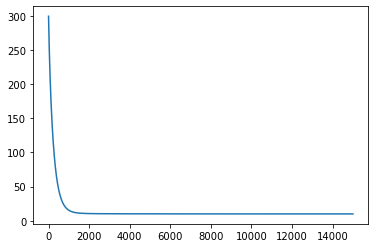

In [14]:
#plotting the cost
plt.plot(c);

We observe that cost decreases as the data is iterated through.

In [15]:
# predicting labels with calculated weights and baises.
def predict(x,w,b):
    return x.dot(w)+b

In [16]:
y_pred_test=predict(x_test,w,b)
y_pred_train=predict(x_train,w,b)

In [17]:
# calculating the R^2 accuracy
def r2score(y_pred,y):
    rss=np.sum((y_pred-y)**2)
    tss=np.sum((y-y.mean())**2)
    
    r2=1-(rss/tss)
    return r2

In [18]:
print("R2 of the train data is ",r2score(y_pred_train,y_train))
print("R2 of the test data is ",r2score(y_pred_test,y_test))

R2 of the train data is  0.7644342799131943
R2 of the test data is  0.6719594701642986


We observe that R2 value is more on the training data as compared to test data. Our model can predict with an R2 score of 67.19% which is good.

In [19]:
#compute MSE
def MSE(y_pred,y):
    rss=np.sum((y_pred-y)**2)
    n,=y.shape
    MSE=rss/(n)
    return MSE

In [20]:
print("MSE of the train data:", MSE(y_pred_train,y_train))
print("MSE of the test data:", MSE(y_pred_test,y_test))


MSE of the train data: 19.967613653356032
MSE of the test data: 27.314459276574947


MSE is less so model performance is good on both training and testing data.

## Using sklearn

In [21]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
model=LR.fit(x_train,y_train)
y_pred_test=LR.predict(x_test)
y_pred_train=LR.predict(x_train)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("R2 of the training data:",model.score(x_train,y_train))
print("R2 of the test data:",model.score(x_test,y_test),'\n')

print("Mean squared error")
print("MSE on the train data is", mean_squared_error(y_train,y_pred_train))
print("MSE on the test data is", mean_squared_error(y_test,y_pred_test))
    

R2 of the training data: 0.7645451026942549
R2 of the test data: 0.6733825506400196 

Mean squared error
MSE on the train data is 19.95821981423805
MSE on the test data is 27.195965766883198


We observe that R2 value is more on the training data as compared to test data. Our model can predict with an R2 score of 67.33% which is good.

Also, MSE is less so model performance is good on both training and testing data.


## Using statsmodel OLS

In [24]:
import statsmodels.api as sm

x_cons=sm.add_constant(x)
x_cons.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,1.0,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.0,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.0,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.0,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [25]:
reg=sm.OLS(y,x_cons).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 24 Jan 2022   Prob (F-statistic):          6.72e-135
Time:                        01:10:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

In [26]:
from statsmodels.tools.eval_measures import mse

y_pred=reg.predict(x_cons)
mse(y,y_pred)

21.894831181729206

R2 is 74.1% & adjusted R2 is 73.4% which is good. Also mean square error(MSE)=21.8948.

*F-statistics is 6.27e-135 which is very less. Hence we can say that our independent variable have significant impact on response variable.*

*All variables except INDUS and AGE have p-value greater than 0.05. Hence all the variable has impact on response variable.*